In [1]:
import re
import os

In [2]:
if 0:
    original_file = 'Logistic_Regression_con_Pytorch.ipynb'
    picprefix = 'regressione-logistica-Pytorch-'
    postid = '17568'

if 0:
    original_file = 'My_First_Pytorch_NN_2.ipynb'
    picprefix = 'primi-passi-Pytorch-'
    postid = '7010'
    
if 0:
    original_file = 'LinearRegression_w_Pytorch2.ipynb'
    picprefix = 'regressione-lineare-Pytorch-'
    postid = '15506'

original_file = 'Modelli_bayesiani_con_Pymc3.ipynb'
picprefix = 'modelli-bayesiani-pymc3-'

In [3]:
print(os.popen('del "1week4\\' + original_file.split('.')[0] + '.html' + '"' ).read())

In [4]:
print(os.popen('jupyter nbconvert --to html ./BayesianModel/' + original_file ).read())

In [5]:
file_to_process = '.\\UNCSS4\\' + original_file.split('.')[0] + '.html'
file_to_process

'.\\UNCSS4\\Modelli_bayesiani_con_Pymc3.html'

In [6]:
'copy ".\\BayesianModel\\' + original_file.split('.')[0] + '.html' + '" "' + file_to_process + '"'

'copy ".\\BayesianModel\\Modelli_bayesiani_con_Pymc3.html" ".\\UNCSS4\\Modelli_bayesiani_con_Pymc3.html"'

In [7]:
print(os.popen('del "' + file_to_process + '"' ).read())
print(os.popen('copy ".\\BayesianModel\\' + original_file.split('.')[0] + '.html' + '" "' + file_to_process + '"').read())


        1 file(s) copied.



In [8]:
file = open(file_to_process, encoding="utf-8")

In [9]:
txtfile = file.read()

In [10]:
file.close()

### remove empty cell

In [12]:
remove_empty_cell = '<div class="cell border-box-sizing text_cell rendered">\s*\n*<div class="prompt input_prompt">\s*\n*\
</div>\s*\n*<div class="inner_cell">\s*\n*<div class="text_cell_render border-box-sizing rendered_html">\s*\n*</div>\s*\n*\
</div>\s*\n*</div>'

In [13]:
remove_empty_cell_match = re.findall(remove_empty_cell, txtfile)

In [14]:
for empty_cell in remove_empty_cell_match:
    txtfile = txtfile.replace(empty_cell,'')

### remove not existing css reference

In [15]:
code_to_remove_pattern1 = '<!-- Custom stylesheet, it must be in the same directory as the html file -->[\n*\t*]*<link href="custom.css" rel="stylesheet" />[\n]*'
code_to_remove_pattern2 = '<!-- Custom stylesheet, it must be in the same directory as the html file -->[\n*\t*]*<link rel="stylesheet" href="custom.css">[\n]*'

In [16]:
code_to_remove1 = re.findall(code_to_remove_pattern1, txtfile)
code_to_remove2 = re.findall(code_to_remove_pattern2, txtfile)

In [17]:
txtfile = txtfile.replace(code_to_remove1[0],'') if code_to_remove1 != [] else txtfile
txtfile = txtfile.replace(code_to_remove2[0],'') if code_to_remove2 != [] else txtfile

### change notebook container

In [18]:
# pattern = '(#notebook-container\s*{[\t*\s*\W*]*})'
# pattern = '(#notebook-container\s*{[\t*\s*\w*:*;*\-*#*\(*\)*]*)'
pattern = '(media not print\s*{\n*\t*\s*#notebook-container\s*{[\t*\s*\w*\D*]*?})'

In [19]:
pattern_to_replace = 'media not print {\n#notebook-container {\npadding:15px;\nbackground-color:#fff;\nmin-height:0;\nmargin-left:0;\npadding-left:0;\nwidth:100%;\nmargin-right:0;\npadding-right:0\n}'

In [20]:
match1 = re.findall(pattern, txtfile)

In [21]:
if (match1 != []):
    txtfile = txtfile.replace(match1[0], pattern_to_replace)

### compact div for text

pattern_original_file = '(<div class=\"cell border-box-sizing text_cell rendered\">\n*<div class=\"prompt input_prompt\"></div>\n*<div class=\"inner_cell\">\n*<div class=\"text_cell_render border-box-sizing rendered_html\">\n*[\w\W]+?<\/div>\n*<\/div>\n*<\/div>)'

block_match = re.findall(pattern_original_file, txtfile)

pattern_to_replace = '(?:<div class=\"cell border-box-sizing text_cell rendered\">\n*<div class=\"prompt input_prompt\"></div>\n*<div class=\"inner_cell\">\n*<div class=\"text_cell_render border-box-sizing rendered_html\">\n*)([\w\W]+?)(?:<\/div>\n*<\/div>\n*<\/div>)'

for i in range(len(block_match)):
#for i in range(2):
    #print(i)
    string_match = re.search(pattern_to_replace, block_match[i])
    #print("found ", block_match[i])
    string_to_replace = '<div class="cell border-box-sizing text_cell rendered inner_cell text_cell_render border-box-sizing rendered_html">\n' + \
        string_match.group(1) + \
        '</div>'
    #print("to replace with", string_to_replace)
    txtfile = txtfile.replace(block_match[i], string_to_replace)

In [22]:
#remove empty div
remove_pattern = '<div class=\"prompt input_prompt\">\s*</div>\n*'
remove_match = re.findall(remove_pattern, txtfile)
for remove_string in remove_match:
    txtfile = txtfile.replace(remove_string,'')

In [23]:
pattern_original_file = '(<div class=\"cell border-box-sizing text_cell rendered\">\n*<div class=\"inner_cell\">\n*<div class=\"text_cell_render border-box-sizing rendered_html\">\n*[\w\W]+?<\/div>\n*<\/div>\n*<\/div>)'
match1 = re.findall(pattern_original_file, txtfile)

In [24]:
pattern_to_replace = '(?:<div class=\"cell border-box-sizing text_cell rendered\">\n*<div class=\"inner_cell\">\n*<div class=\"text_cell_render border-box-sizing rendered_html\">\n*)([\w\W]+?)(?:<\/div>\n*<\/div>\n*<\/div>)'
match2 = re.findall(pattern_to_replace, txtfile)

In [25]:
for idx, pattern in enumerate(match1):
    new = '<div class="cell border-box-sizing text_cell rendered inner_cell text_cell_render border-box-sizing rendered_html">\n' + match2[idx] + '</div>'
    txtfile = txtfile.replace(match1[idx], new)

### remove flex-direction: row; from div.text_cell

In [26]:
flex_pattern = '(div\.text_cell {\n[\W\w]*?})'

In [27]:
txt_cell_match = re.findall(flex_pattern, txtfile)

In [28]:
for i in range(len(txt_cell_match)):
    new_text = txt_cell_match[i].replace('flex-direction: row;\n', '')
    txtfile = txtfile.replace(txt_cell_match[i], new_text)

### add margin-left to div.text_cell_render

In [29]:
# div_pattern = '(div\.text_cell_render {\n[\W\w]*?})'
div_pattern = '(div\.text_cell_render\s*{\n*[\W\w]*?})'

In [30]:
div_cell_match = re.findall(div_pattern, txtfile)

In [31]:
end_div_cell = re.findall('(\;*\n*})', div_cell_match[0])

In [32]:
div_to_replace = div_cell_match[0].replace(end_div_cell[0],';\nmargin-left: 1.6em;\ndisplay:block;\n}')

In [33]:
txtfile = txtfile.replace(div_cell_match[0],div_to_replace)

### change p margin

In [34]:
p_pattern = 'p\s*{\s*margin: 0 0 9px;\n}'
new_p_pattern = 'p{\nmargin:0 1px 9px;font-size: 16px;line-height: 24px;\n}'

In [35]:
p_match = re.findall(p_pattern, txtfile)

In [36]:
try:
    txtfile = txtfile.replace(p_match[0], new_p_pattern)
except:
    pass

### change rendered_html ul

In [37]:
ul_pattern = '.rendered_html ul\s*{[\t*\s*\w*\D*]*?}'
new_ul_pattern = '.rendered_html ul {\nlist-style: disc;\nfont-size:16px;\nline-height: 23px;\n}'

In [38]:
ul_match = re.findall(ul_pattern, txtfile)

In [39]:
txtfile = txtfile.replace(ul_match[0], new_ul_pattern)

### salva style in un file a parte

In [40]:
style_pattern = '(<style type=\"text/css\">[\w\W\n]*?</style>)' #selecting the complete style css inclusive tag
style_match = re.findall(style_pattern, txtfile)

In [41]:
css_select_pattern = '(?:<style type=\"text/css\">)([\w\W\n]*?)(?:</style>)' #selecting the complete style css
css_select_match = re.findall(css_select_pattern, txtfile)

In [42]:
style_pattern2 = '(<style scoped="" type=\"text/css\">[\w\W\n]*?</style>)'
style_match2 = re.findall(style_pattern2, txtfile)

css_select_pattern2 = '(?:<style scoped=\"\" type=\"text/css\">)([\w\W\n]*?)(?:</style>)'
css_select_match2 = re.findall(css_select_pattern2, txtfile)

style_pattern3 = '(<style scoped>[\w\W\n]*?</style>)'
style_match3 = re.findall(style_pattern3, txtfile)

css_select_pattern3 = '(?:<style scoped>)([\w\W\n]*?)(?:</style>)'
css_select_match3 = re.findall(css_select_pattern3, txtfile)


In [43]:
#select only unique styles
for style in zip(css_select_match2,css_select_match3):
    if style not in css_select_match:
        css_select_match.append(style)

In [44]:
# css_to_file = css_select_match[0] + '\n' + css_select_match[1] + '\n' + css_select_match[2]

In [45]:
css_to_file = ''
for css in css_select_match:
    css_to_file = css_to_file + css + '\n'

In [46]:
f = open("./UNCSS4/jupyter.css","w+")
f.write(css_to_file)
f.close()

In [47]:
print(len(style_match))
print(len(style_match2))
print(len(style_match3))

3
0
2


### rimuovi style dal html

In [48]:
def remove_style(txtfile, style_match):
    for string in style_match:
#         print('removing %s' %string)
        txtfile = txtfile.replace(string, '')
    return txtfile

In [49]:
txtfile=remove_style(txtfile, style_match)
txtfile=remove_style(txtfile, style_match2)
txtfile=remove_style(txtfile, style_match3)

In [50]:
# txtfile = txtfile.replace(string_to_remove[0], '/* reinsert css here */')
# for string in string_to_remove:
#     txtfile = txtfile.replace(string, '')

In [67]:
with open("./UNCSS4/temp.html", 'w', encoding='utf-8') as f:
    print(txtfile, file=f)

### purifycss

In [419]:
# print(os.popen('purifycss ./UNCSS4/Jupyter.css ./UNCSS4/temp.html --min --out ./UNCSS4/Jupyter.css --info').read())


    ________________________________________________
    |
    |   PurifyCSS has reduced the file size by ~ 85.8%  
    |
    ________________________________________________
    



### reinserisci css nel html

newcssfile = open('./uncss4/Jupyter.css')

newcsstxt = newcssfile.read()

newcsstxt = '<style type="text/css">' + newcsstxt + '\n</style>'

txtfile = txtfile.replace('/* reinsert css here */', newcsstxt)

f = open("./UNCSS4/temp.html","w+")
f.write(txtfile)
f.close()

newcssfile.close()

### delete temp.html file + copy to final file

print(os.popen('del .\\UNCSS4\\Jupyter.css').read())

In [68]:
print(os.popen('del "' + file_to_process + '"').read())

In [69]:
print(os.popen('copy .\\UNCSS4\\temp.html "' + file_to_process + '"').read())

        1 file(s) copied.



In [70]:
print(os.popen('del .\\UNCSS4\\temp.html').read())

D:\AnacondaProjects\UNCSS4\temp.html



### find everything between body tags

In [71]:
body_pattern = '(?:<body>\n*\s*)([\w\W\n]*?)(?:</body>)' 
body_match = re.findall(body_pattern, txtfile)

In [72]:
body = body_match[0]

## prepare post
### import library - define user

In [74]:
import requests
import json
import base64

In [75]:
user = 'antozamm'
pythonapp = '8PbW e3Li Ejnv j9J2 Hgrd 3Ek0'
url = 'https://www.1week4.com/wp-json/wp/v2'

### codify user and password

In [76]:
token = base64.standard_b64encode((user + ':' + pythonapp).encode("utf-8"))
headers = {'Authorization': 'Basic ' + str(token, "utf-8")}

### find all images stored as base64 image

In [77]:
img_pattern = '(?:img src=\")(data:image[\/\w\W]*?)(?:\"\s*/*>)'
img_match = re.findall(img_pattern,txtfile)

### save images as jpg

In [79]:
from PIL import Image
from io import BytesIO
import random

def imsave(pic, picname):
#     im = Image.open(BytesIO(base64.b64decode(pic)))
#     if im.mode in ("RGBA", "P"):
#         im = im.convert("RGB")
#     im.save(picname, 'JPEG', quality='maximum')
    im = Image.open(BytesIO(base64.b64decode(pic)))
    im.save(picname, 'PNG')

In [80]:
picname = []
for idx,img in enumerate(img_match):
    pic = img[:-1].split(',')[1]
    picname.append( picprefix + str(random.randint(2e31+1,2e32)) + '.png' )
    imsave(pic, picname[idx] )

pic = img[:-1].split(',')[1]
im = Image.open(BytesIO(base64.b64decode(pic.encode("utf-8"))))
# im = Image.open(BytesIO(pic))
# if im.mode in ("RGBA", "P"):
#     im = im.convert("RGB")
im.save('aaa.png', 'PNG', quality='maximum')

### upload pics

In [81]:
def uploadMedia(imgPath):
    data = open(imgPath, 'rb').read()
    fileName = os.path.basename(imgPath)
    headers = {'Authorization': 'Basic ' + str(token, "utf-8"), 'Content-Type': '', \
               'Content-Disposition': 'attachment; filename={}'.format(imgPath)}
    r = requests.post(url + '/media', headers=headers, data=data)
    print('Your post is published on ' + json.loads(r.content)['link'])
    return json.loads(r.content)['guid']['raw']

In [82]:
picLinkList = []
picLinkList = [uploadMedia(picname[idx]) for idx in range(len(img_match))]

Your post is published on https://www.1week4.com/modelli-bayesiani-pymc3-42139425219047447277923198329097/
Your post is published on https://www.1week4.com/modelli-bayesiani-pymc3-41991662822083940168956511547887/
Your post is published on https://www.1week4.com/modelli-bayesiani-pymc3-114488643625369928180430136789285/
Your post is published on https://www.1week4.com/modelli-bayesiani-pymc3-47826170745640711411219560250675/
Your post is published on https://www.1week4.com/modelli-bayesiani-pymc3-78031576177836376159463465325257/
Your post is published on https://www.1week4.com/modelli-bayesiani-pymc3-70583849762835761819156686524549/
Your post is published on https://www.1week4.com/modelli-bayesiani-pymc3-63287649704732252013427422310479/
Your post is published on https://www.1week4.com/modelli-bayesiani-pymc3-145037074592398803157461552750105/
Your post is published on https://www.1week4.com/modelli-bayesiani-pymc3-121068363449011043211362007287431/
Your post is published on https://

data = open(imgPath, 'rb').read()
fileName = os.path.basename(imgPath)
headers = {'Authorization': 'Basic ' + str(token, "utf-8"), 'Content-Type': '', \
           'Content-Disposition': 'attachment; filename={}'.format(imgPath)}
r = requests.post(url + '/media', headers=headers, data=data)

r.reason

### replace base64 code with link

In [83]:
for idx,img in enumerate(img_match):
    body = body.replace(img_match[idx],picLinkList[idx])

### prepare post

with open('prova.txt') as file:
    body = file.read()


body = ' <div> <style scoped="" type="text/css">.dataframe tbody tr th:only-of-type { vertical-align: middle; } </style> </div>'

In [84]:
# body = ''
post = {'date': '2019-11-10T13:00:35',
        'title': 'Prova jupyter post 3',
        'slug': 'rest-api-3',
        'status': 'draft',
        'content': body,
        'author': '2',
        'excerpt': 'Prova jupyter post',
        'format': 'standard',
        'template': 'page-blog-az-jupyter.php',
        'categories':'7', #machine-learning=7
        }
# body

### publish new post

In [85]:
headers = {'Authorization': 'Basic ' + str(token, "utf-8")}
r = requests.post(url + '/posts', headers=headers, json=post)
print('Your post is published on ' + json.loads(r.content, encoding="utf-8")['link'])

Your post is published on https://www.1week4.com/?p=44041


### update post

In [435]:
# postid = '30945'
updatepost = { 'content': body }

In [436]:
updatedpost = requests.post(url + '/posts/' + postid, headers=headers, json=updatepost)
print('The updated post is published on ' + json.loads(updatedpost.content, encoding="utf-8")['link'])

The updated post is published on https://www.1week4.com/it/machine-learning/regressione-logistica-pytorch/


### request a post

In [510]:
r = requests.post(url + '/posts/31677', headers=headers)

In [511]:
parsed = json.loads(r.content)
print(json.dumps(parsed, indent=4, sort_keys=True))

{
    "_links": {
        "about": [
            {
                "href": "https://www.1week4.com/wp-json/wp/v2/types/post"
            }
        ],
        "author": [
            {
                "embeddable": true,
                "href": "https://www.1week4.com/wp-json/wp/v2/users/2"
            }
        ],
        "collection": [
            {
                "href": "https://www.1week4.com/wp-json/wp/v2/posts"
            }
        ],
        "curies": [
            {
                "href": "https://api.w.org/{rel}",
                "name": "wp",
                "templated": true
            }
        ],
        "predecessor-version": [
            {
                "href": "https://www.1week4.com/wp-json/wp/v2/posts/31677/revisions/31942",
                "id": 31942
            }
        ],
        "replies": [
            {
                "embeddable": true,
                "href": "https://www.1week4.com/wp-json/wp/v2/comments?post=31677"
            }
        ],
       

In [321]:
imsave(pic, 'pic1.jpg')

Error: Incorrect padding

In [826]:
txt = 'porco cazzo porco'

In [827]:
txt.replace('porco', 'cane')

'cane cazzo cane'

'<!DOCTYPE html>\n<html>\n<head><meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\t<title>Logistic_Regression_con_Pytorch</title>\n\t<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.1.10/require.min.js"></script><script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js"></script>\n\t<style type="text/css">/*!\n*\n* Twitter Bootstrap\n*\n*//*!\n * Bootstrap v3.3.7 (http://getbootstrap.com)\n * Copyright 2011-2016 Twitter, Inc.\n * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE)\n *//*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */html{font-family:sans-serif;-ms-text-size-adjust:100%;-webkit-text-size-adjust:100%}body{margin:0}figure{display:block}[hidden]{display:none}a{background-color:transparent}a:active,a:hover{outline:0}b,strong{font-weight:700}h1{font-size:2em;margin:.67em 0}img{border:0}figure{margin:1em 40px}hr{box-sizing:content-box;height:0}pre{overflow:auto}code,pre{
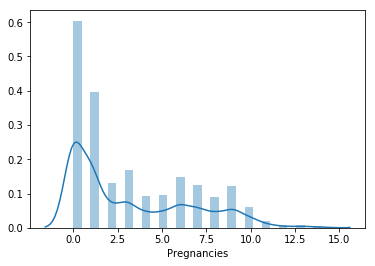
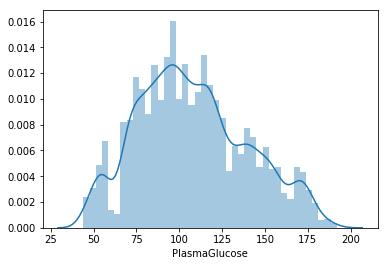
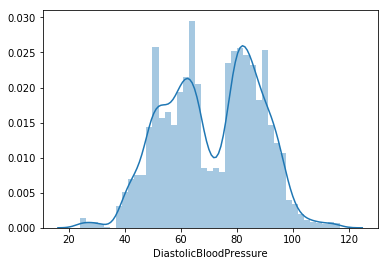
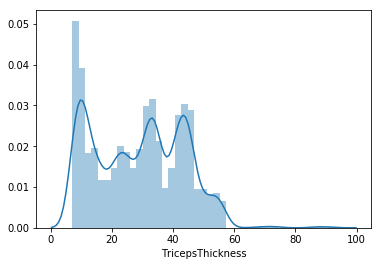
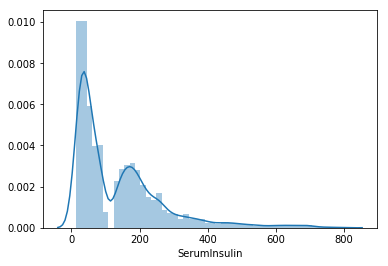
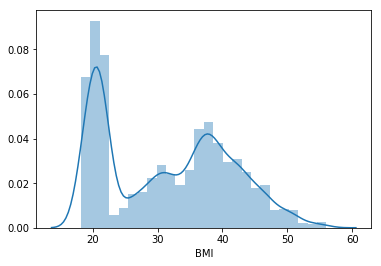
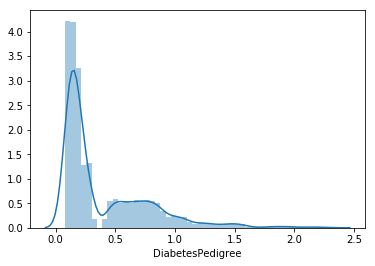
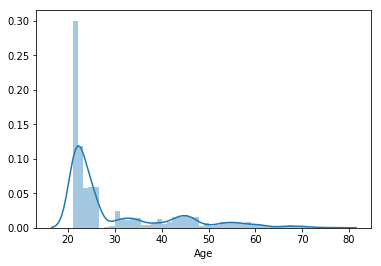
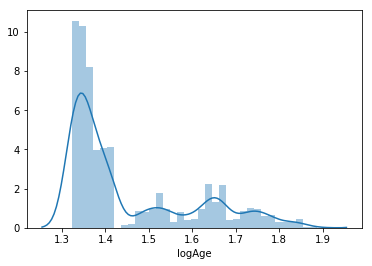
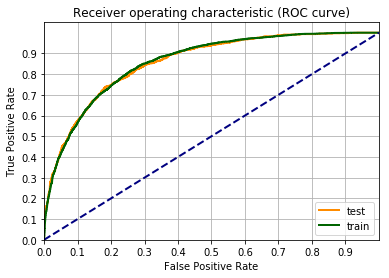
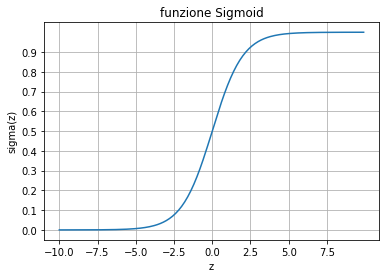
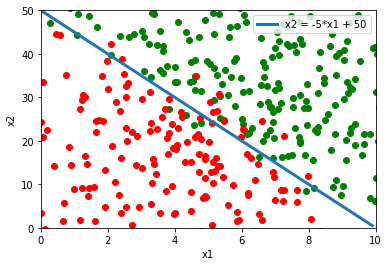
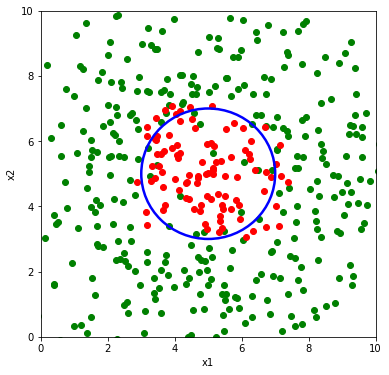
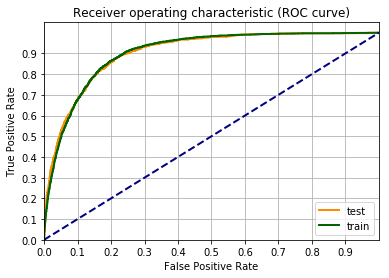
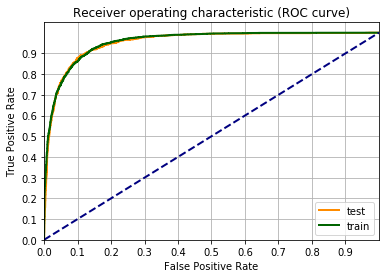
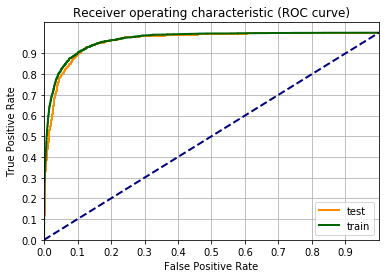
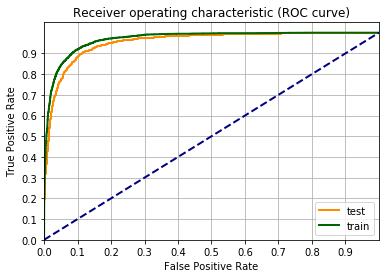

In [828]:
txtfile